In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('bmh')

In [2]:
df = pd.read_csv('DelayedFlights.csv')
df = df.rename(columns={'Unnamed: 0': 'Index'})
df.head()

,Index,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Index              int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [4]:
#drop sparse
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Index']
print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")
print('\n')
df = df2

List of dropped columns: Index, 



In [5]:
df = df.drop(columns=['Year'])
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,...,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN


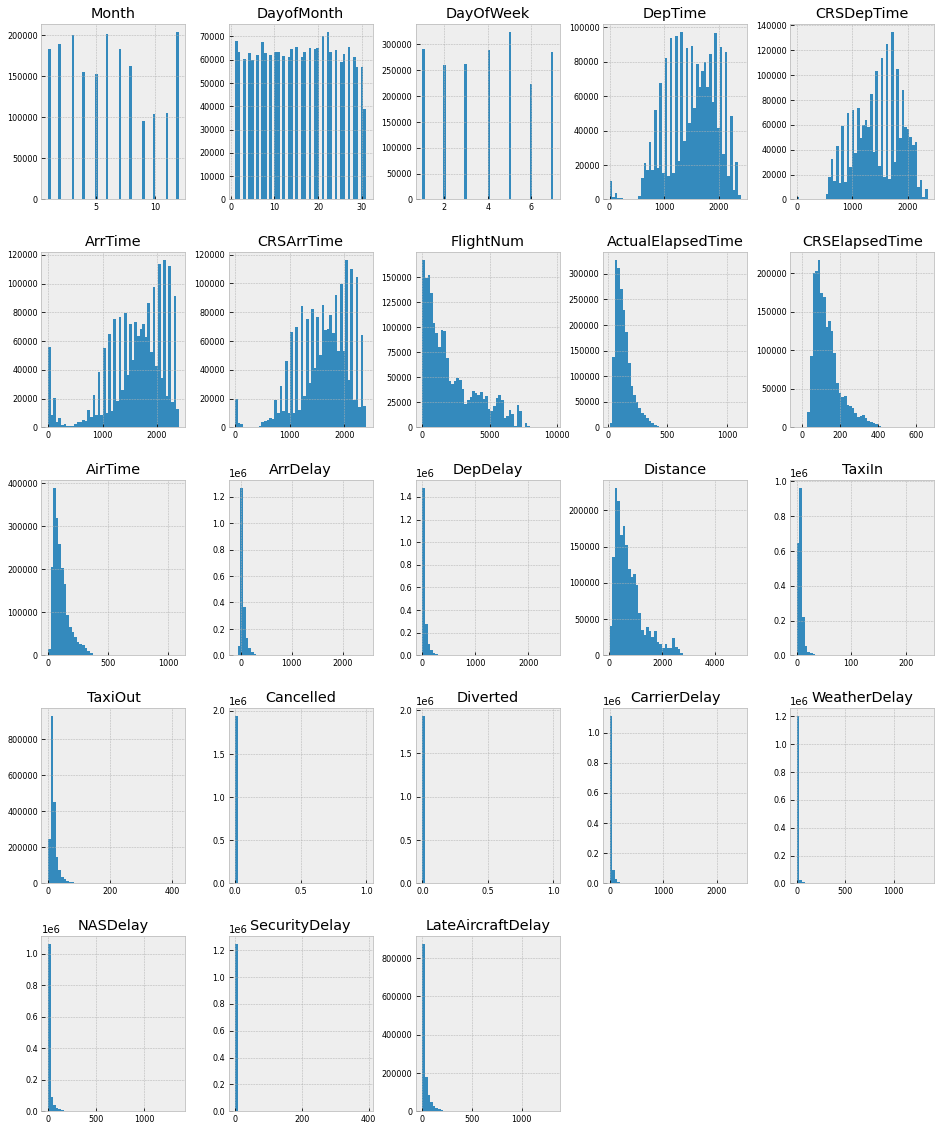

In [7]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [8]:
non_zero_cancelled = df.loc[df['Cancelled'] != 0]
values = non_zero_cancelled['Cancelled']
print(values)

1542406    1
1546593    1
1547161    1
1547178    1
1548271    1
          ..
1934590    1
1935491    1
1935651    1
1935876    1
1936470    1
Name: Cancelled, Length: 633, dtype: int64


In [9]:
non_zero_diverted = df.loc[df['Diverted'] != 0]
values2 = non_zero_cancelled['Diverted']
print(values2)

1542406    0
1546593    0
1547161    0
1547178    0
1548271    0
          ..
1934590    0
1935491    0
1935651    0
1935876    0
1936470    0
Name: Diverted, Length: 633, dtype: int64


In [10]:
df = df.drop(columns=['Cancelled'])

In [11]:
df = df.drop(columns=['CancellationCode'])
df = df.drop(columns=['Diverted'])

In [12]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,IAD,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,IND,JAX,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


In [23]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


In [14]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   FlightNum          int64  
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Distance           int64  
 14  TaxiIn             float64
 15  TaxiOut            float64
 16  CarrierDelay       float64
 17  WeatherDelay       float64
 18  NASDelay           float64
 19  SecurityDelay      float64
 20  LateAircraftDelay  float64
dtypes: float64(14), int64(7)
memory usage: 310.3 MB


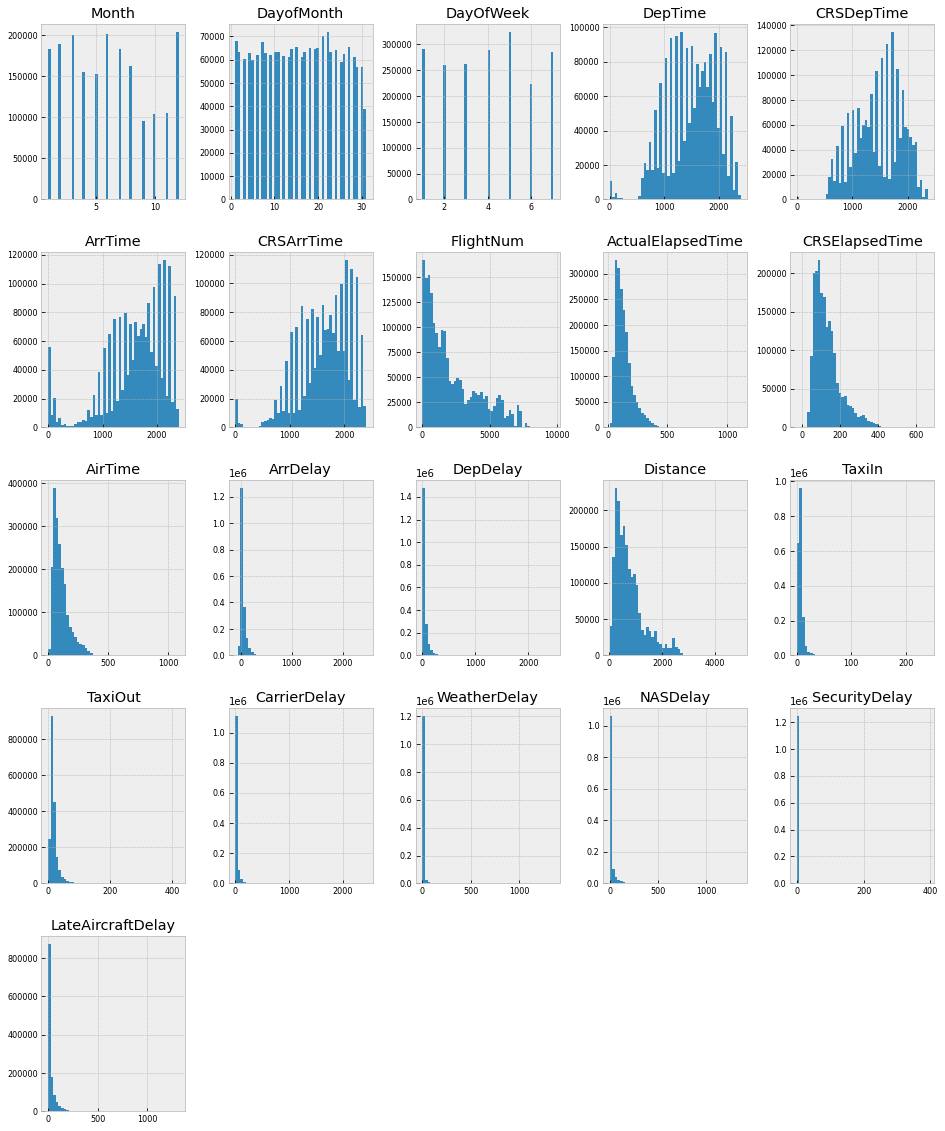

In [15]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [16]:
df_num_corr_arrdelay = df_num.corr()['ArrDelay']
golden_features_list_arrdelay = df_num_corr_arrdelay[abs(df_num_corr_arrdelay) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated(>0.5) values with ArrDelay:\n{}".format(len(golden_features_list_arrdelay), golden_features_list_arrdelay))

There are 3 strongly correlated(>0.5) values with ArrDelay:
ArrDelay        1.000000
DepDelay        0.952927
CarrierDelay    0.501773
Name: ArrDelay, dtype: float64


In [17]:
df_num_corr_depdelay = df_num.corr()['DepDelay']
golden_features_list_depdelay = df_num_corr_depdelay[abs(df_num_corr_depdelay) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with DepDelay:\n{}".format(len(golden_features_list_depdelay), golden_features_list_depdelay))

There are 4 strongly correlated values with DepDelay:
DepDelay             1.000000
ArrDelay             0.952927
CarrierDelay         0.528038
LateAircraftDelay    0.513041
Name: DepDelay, dtype: float64


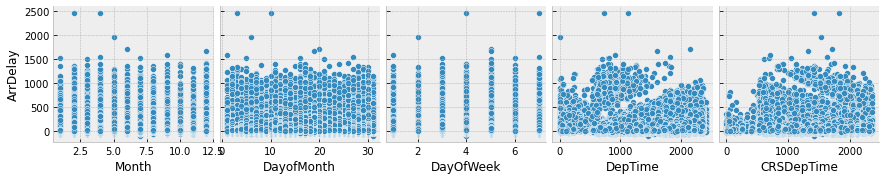

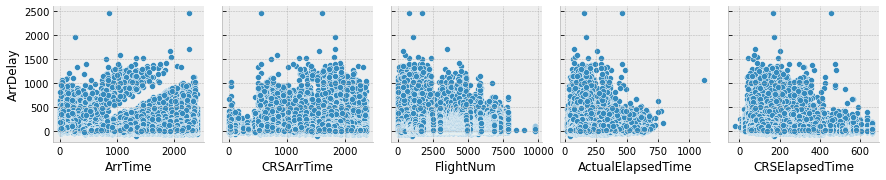

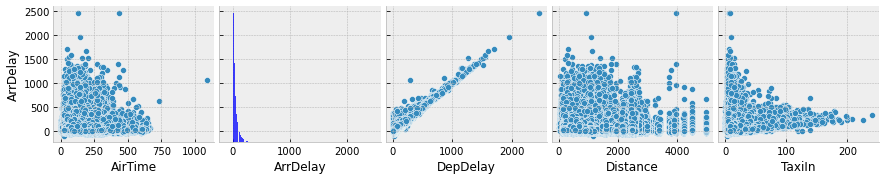

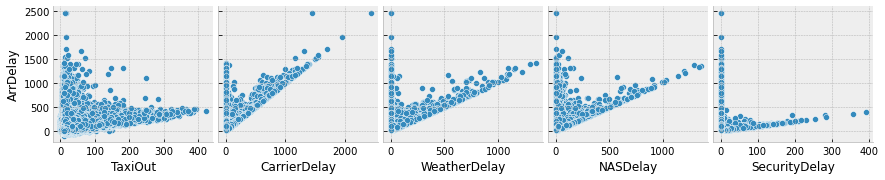

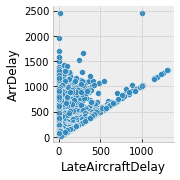

In [18]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['ArrDelay'])

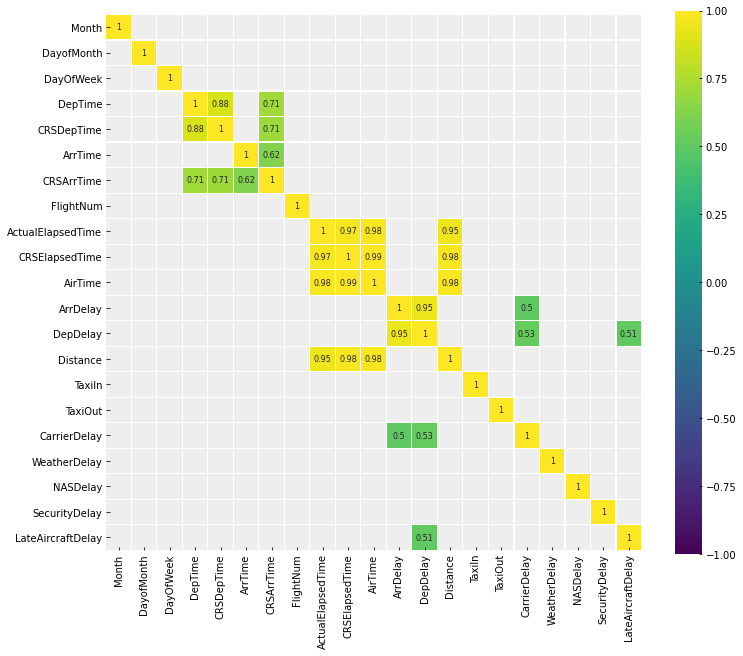

In [19]:
corr = df_num.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);



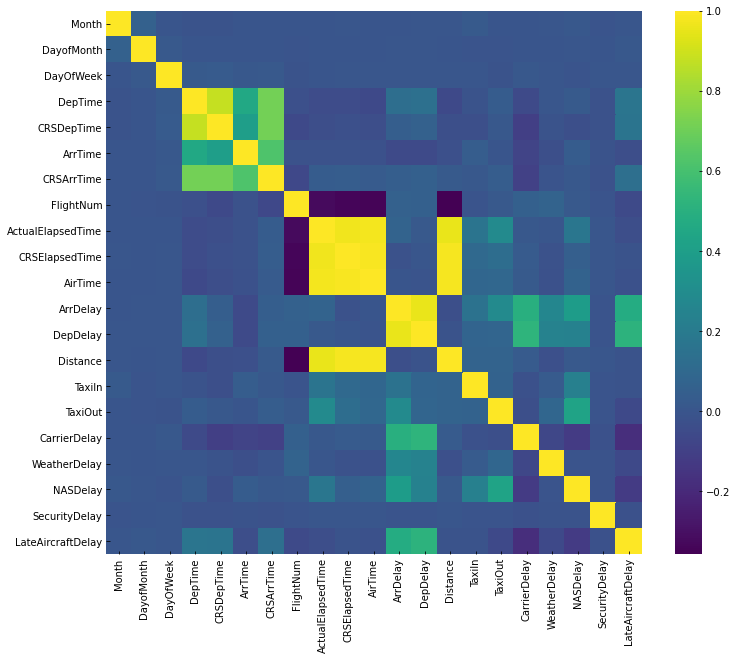

In [27]:
plt.figure(figsize=(12, 10))
dataplot = sns.heatmap(df_num.corr(), cmap="viridis", annot=False)

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df_num.head()
#X = df_num.drop("ArrDelay", axis=1)
#y = df_num["ArrDelay"]
#best_features = SelectKBest(score_func=chi2, k=10)
#fit = best_features.fit(X, y)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,335,128.0,150.0,...,-14.0,8.0,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,3231,128.0,145.0,...,2.0,19.0,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,448,96.0,90.0,...,14.0,8.0,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,3920,90.0,90.0,...,34.0,34.0,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,378,101.0,115.0,...,11.0,25.0,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


In [26]:
X = df_num.drop("ArrDelay", axis=1)
y = df_num["ArrDelay"]
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').